# Exploratory Data Analysis Starter

## Import packages

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
client_df = pd.read_csv("client_data.csv")
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [ ]:
price_df = pd.read_csv("price_data.csv")
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

---

## Descriptive statistics of data

### Data types and No of unique values


In [ ]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
client_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [ ]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

### Statistics



In [ ]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [ ]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Renaming the Channel Labels and Electricity Campaigns to a more understandable way

In [ ]:
unique_names = client_df[client_df['channel_sales'] != 'MISSING']['channel_sales'].unique()

mapping_dict = {name: f'channel {i+1}' for i, name in enumerate(unique_names)}

mapping_dict['MISSING'] = 'MISSING'

client_df['channel_sales'] = client_df['channel_sales'].map(mapping_dict)

print(client_df['channel_sales'].value_counts())

channel 1    6754
MISSING      3725
channel 2    1843
channel 3    1375
channel 4     893
channel 6      11
channel 5       3
channel 7       2
Name: channel_sales, dtype: int64


In [ ]:
unique_names = client_df[client_df['origin_up'] != 'MISSING']['origin_up'].unique()

mapping_dict = {name: f'Campaign {i+1}' for i, name in enumerate(unique_names)}

mapping_dict['MISSING'] = 'MISSING'

client_df['origin_up'] = client_df['origin_up'].map(mapping_dict)

print(client_df['origin_up'].value_counts())

Campaign 1    7097
Campaign 2    4294
Campaign 3    3148
MISSING         64
Campaign 4       2
Campaign 5       1
Name: origin_up, dtype: int64


---

## Data visualization

Overall churn rate analysis

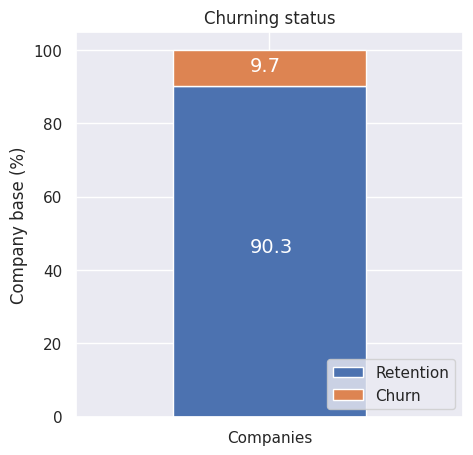

In [ ]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

#Plot the overall churn rate
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

Channel wise churn rate analysis

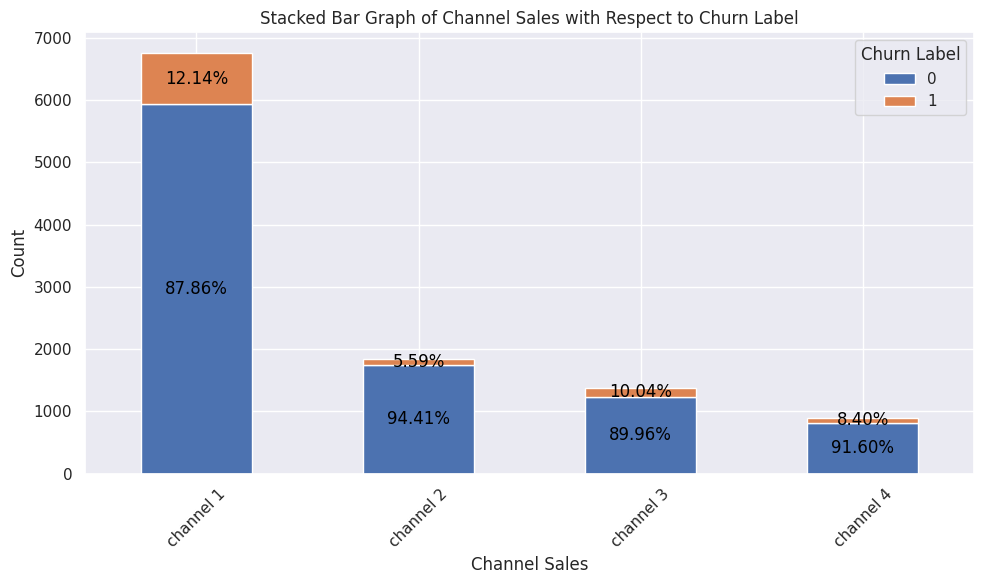

In [ ]:
#Plotting the retention rate through each channel sales

#Filtering out 'MISSING', 'channel 5', 'channel 6', 'channel 7' due to lack of data
filtered_data = client_df[~client_df['channel_sales'].isin(['MISSING', 'channel 5', 'channel 6', 'channel 7'])]
grouped_data = filtered_data.groupby(['channel_sales', 'churn']).size().unstack()

totals = grouped_data.sum(axis=1)
churn_percentage = (grouped_data[1] / totals) * 100

sorted_index = totals.sort_values(ascending=False).index
sorted_data = grouped_data.loc[sorted_index]

# Plot stacked bar graph
ax = sorted_data.plot(kind='bar', stacked=True, figsize=(10, 6))

for i, (index, row) in enumerate(sorted_data.iterrows()):
    total = totals[index]
    for j, value in enumerate(row):
        if j == 0:  # Churned stack
            ax.text(i, value / 2, f'{(value / total * 100):.2f}%', ha='center', va='center', color='black')
        else:  # Retention stack
            ax.text(i, value / 2 + row[j - 1], f'{(value / total * 100):.2f}%', ha='center', va='center', color='black')


# Set plot labels and title
plt.xlabel('Channel Sales')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Channel Sales with Respect to Churn Label')
plt.legend(title='Churn Label')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Electricity campaign wise churn rate analysis

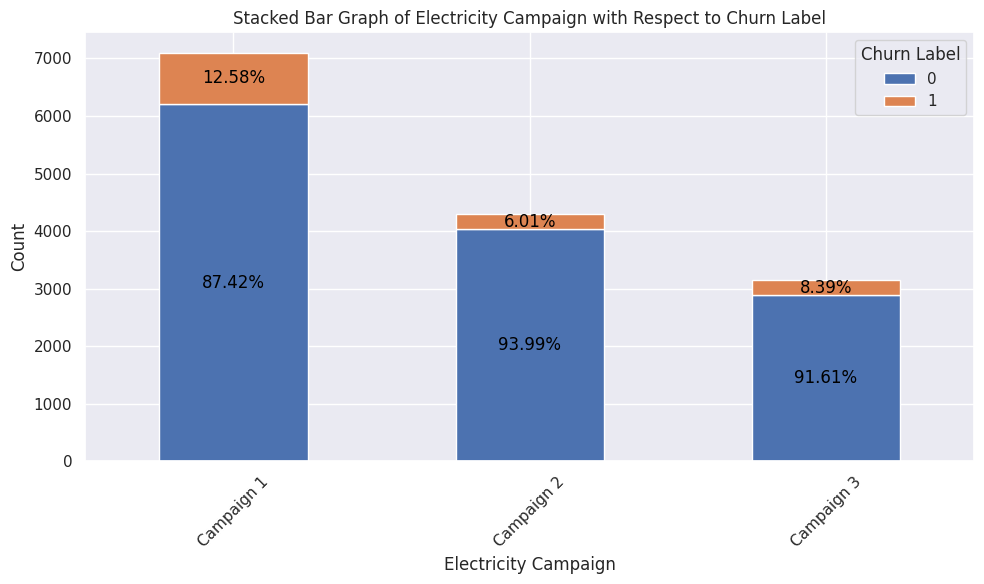

In [ ]:
#Filtering out 'MISSING', 'channel 5', 'Campaign 5', 'Campaign 4' due to lack of data
filtered_data = client_df[~client_df['origin_up'].isin(['MISSING', 'Campaign 4', 'Campaign 5'])]
grouped_data = filtered_data.groupby(['origin_up', 'churn']).size().unstack()

totals = grouped_data.sum(axis=1)
churn_percentage = (grouped_data[1] / totals) * 100

sorted_index = totals.sort_values(ascending=False).index
sorted_data = grouped_data.loc[sorted_index]

# Plot stacked bar graph
ax = sorted_data.plot(kind='bar', stacked=True, figsize=(10, 6))

for i, (index, row) in enumerate(sorted_data.iterrows()):
    total = totals[index]
    for j, value in enumerate(row):
        if j == 0:  # Churned stack
            ax.text(i, value / 2, f'{(value / total * 100):.2f}%', ha='center', va='center', color='black')
        else:  # Retention stack
            ax.text(i, value / 2 + row[j - 1], f'{(value / total * 100):.2f}%', ha='center', va='center', color='black')


# Set plot labels and title
plt.xlabel('Electricity Campaign')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Electricity Campaign with Respect to Churn Label')
plt.legend(title='Churn Label')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Churn rate analysis for forecast_price_energy_off_peak

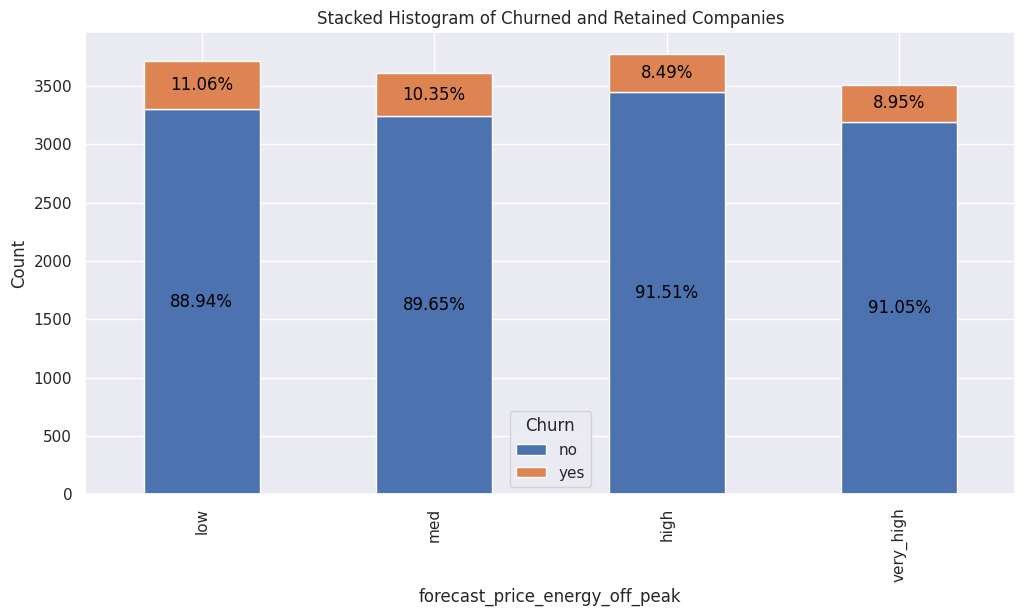

In [ ]:
new_df = pd.DataFrame()

def plot_stacked_histogram(dataframe, col, ax):
    # Calculate quantiles
    q1 = dataframe[col].quantile(0.25)
    q2 = dataframe[col].quantile(0.50)
    q3 = dataframe[col].quantile(0.75)

    # Define labels for quantiles
    labels = ['low', 'med', 'high', 'very_high']

    # Create a new column to store categorized levels
    new_df[col] = pd.cut(dataframe[col], bins=[0, q1, q2, q3, float('inf')], labels=labels)

    # Map churn status to 'yes' or 'no'
    new_df['churn_label'] = dataframe['churn'].map({0: 'no', 1: 'yes'})

    new_df.loc[(dataframe[col] <= 0) | (dataframe[col] < q1), col] = 'low'

    # Group data by category and churn label
    grouped_data = new_df.groupby([col, 'churn_label']).size().unstack()
    totals = grouped_data.sum(axis=1)
    churn_percentage = (grouped_data['yes'] / totals) * 100

    # Plot the stacked histogram
    grouped_data.plot(kind='bar', stacked=True, ax=ax)

    for i, (index, row) in enumerate(grouped_data.iterrows()):
      total = totals[index]
      for j, value in enumerate(row):
          if j == 0:  # Churned stack
              ax.text(i, value / 2, f'{(value / total * 100):.2f}%', ha='center', va='center', color='black')
          else:  # Retention stack
              ax.text(i, value / 2 + row[j - 1], f'{(value / total * 100):.2f}%', ha='center', va='center', color='black')


    # Set plot labels and title
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title('Stacked Histogram of Churned and Retained Companies')

    # Show legend
    ax.legend(title='Churn')

    # Show the plot
    plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
plot_stacked_histogram(client_df, 'forecast_price_energy_off_peak', ax)


Merging client and price data to visualize current price and forecasted price variations

In [ ]:
# Convert 'price_date' to datetime objects
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

# Extract year from 'price_date'
price_df['year'] = price_df['price_date'].dt.year

#grouping price data to determine mean price for the whole year
grouped_data = price_df.groupby(['id', 'year']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

client_data_selected = client_df[['id', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak','churn']]

# Merge client_df and grouped_data based on 'id'
merged_data = pd.merge(client_data_selected, grouped_data, on='id', how='inner')

# Select desired columns from the merged DataFrame
final_data = merged_data[['id',
                          'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
                          'price_off_peak_var', 'price_peak_var', 'price_off_peak_fix', 'price_peak_fix','churn']]
final_data

,id,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.114481,0.098142,40.606701,0.124787,0.100749,40.942265,22.352010,1
1,d29c2c54acc38ff3c0614d0a653813dd,0.145711,0.000000,44.311378,0.149609,0.007124,44.311375,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,0.165794,0.087899,44.311378,0.170512,0.088421,44.385450,0.000000,0
3,bba03439a292a1e166f80264c16191cb,0.146694,0.000000,44.311378,0.151210,0.000000,44.400265,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,0.116900,0.100015,40.606701,0.124174,0.103638,40.688156,24.412893,0
...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0.138305,0.000000,44.311378,0.144124,0.000000,44.370635,0.000000,0
14602,d0a6f71671571ed83b2645d23af6de00,0.100167,0.091892,58.995952,0.106799,0.095406,59.015674,36.393379,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,0.116900,0.100015,40.606701,0.124338,0.103794,40.701732,24.421038,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,0.145711,0.000000,44.311378,0.149609,0.007124,44.311375,0.000000,0


Scatter plot between current price and forecasted price

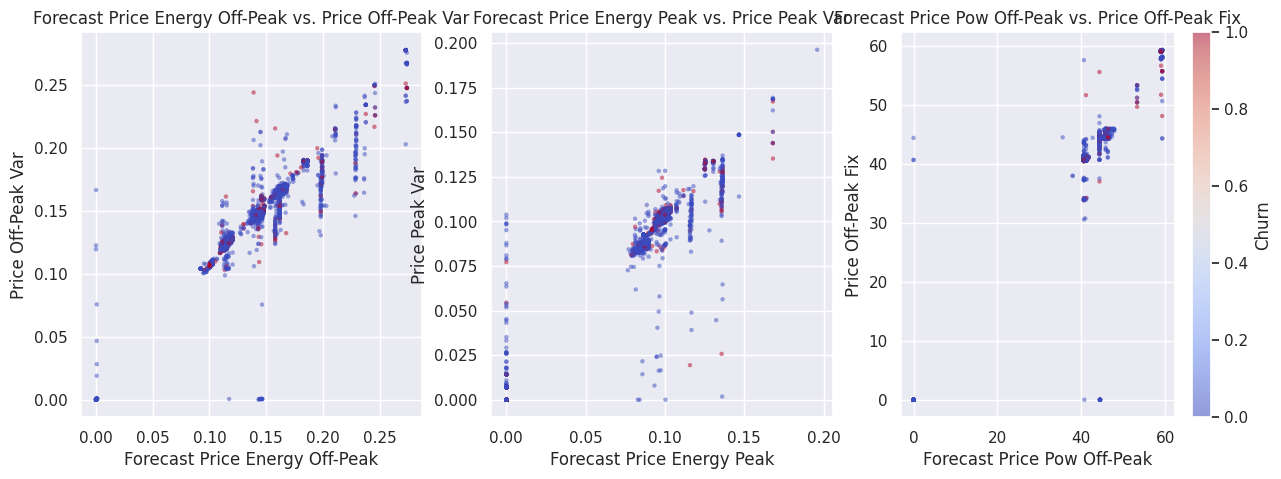

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plots
plt.figure(figsize=(15, 5))

# Scatter plot for forecast_price_energy_off_peak vs. price_off_peak_var
plt.subplot(1, 3, 1)
plt.scatter(final_data['forecast_price_energy_off_peak'], final_data['price_off_peak_var'], c=final_data['churn'], cmap='coolwarm', alpha=0.5, marker='o', edgecolors='none', s=10)
plt.xlabel('Forecast Price Energy Off-Peak')
plt.ylabel('Price Off-Peak Var')
plt.title('Forecast Price Energy Off-Peak vs. Price Off-Peak Var')

# Scatter plot for forecast_price_energy_peak vs. price_peak_var
plt.subplot(1, 3, 2)
plt.scatter(final_data['forecast_price_energy_peak'], final_data['price_peak_var'], c=final_data['churn'], cmap='coolwarm', alpha=0.5, marker='o', edgecolors='none', s=10)
plt.xlabel('Forecast Price Energy Peak')
plt.ylabel('Price Peak Var')
plt.title('Forecast Price Energy Peak vs. Price Peak Var')

# Scatter plot for forecast_price_pow_off_peak vs. price_off_peak_fix
plt.subplot(1, 3, 3)
plt.scatter(final_data['forecast_price_pow_off_peak'], final_data['price_off_peak_fix'], c=final_data['churn'], cmap='coolwarm', alpha=0.5, marker='o', edgecolors='none', s=10)
plt.xlabel('Forecast Price Pow Off-Peak')
plt.ylabel('Price Off-Peak Fix')
plt.title('Forecast Price Pow Off-Peak vs. Price Off-Peak Fix')

# Add colorbar
plt.colorbar(label='Churn')


Visualizing the percentage of price variation for churned and retented companies

In [ ]:
percent_df = pd.DataFrame
percent_df = final_data[['id','churn']]

percent_df['percentage_increase_off_peak_var'] = ((final_data['price_off_peak_var'] - final_data['forecast_price_energy_off_peak']) / final_data['forecast_price_energy_off_peak']) * 100
percent_df['percentage_increase_peak_var'] = ((final_data['price_peak_var'] - final_data['forecast_price_energy_peak']) / final_data['forecast_price_energy_peak']) * 100
percent_df['percentage_increase_off_peak_fix'] = ((final_data['price_off_peak_fix'] - final_data['forecast_price_pow_off_peak']) / final_data['forecast_price_pow_off_peak']) * 100

percent_df.replace([np.inf, -np.inf], np.nan, inplace=True)
percent_df.fillna(percent_df.mean(), inplace=True)


<ipython-input-117-9f46afce7ec8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_df['percentage_increase_off_peak_var'] = ((final_data['price_off_peak_var'] - final_data['forecast_price_energy_off_peak']) / final_data['forecast_price_energy_off_peak']) * 100
<ipython-input-117-9f46afce7ec8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_df['percentage_increase_peak_var'] = ((final_data['price_peak_var'] - final_data['forecast_price_energy_peak']) / final_data['forecast_price_energy_peak']

In [ ]:
percent_df.describe()

,churn,percentage_increase_off_peak_var,percentage_increase_peak_var,percentage_increase_off_peak_fix
count,14606.000000,14606.000000,14606.000000,14606.000000
mean,0.097152,5.986364,2.294128,-0.456930
std,0.296175,130.019459,3.970832,3.421874
min,0.000000,-100.000000,-100.000000,-100.000000
25%,0.000000,2.578906,2.294128,-0.100307
50%,0.000000,3.259557,2.294128,0.033429
75%,0.000000,6.582721,3.590232,0.167162
max,1.000000,12529.569444,33.548792,41.646752


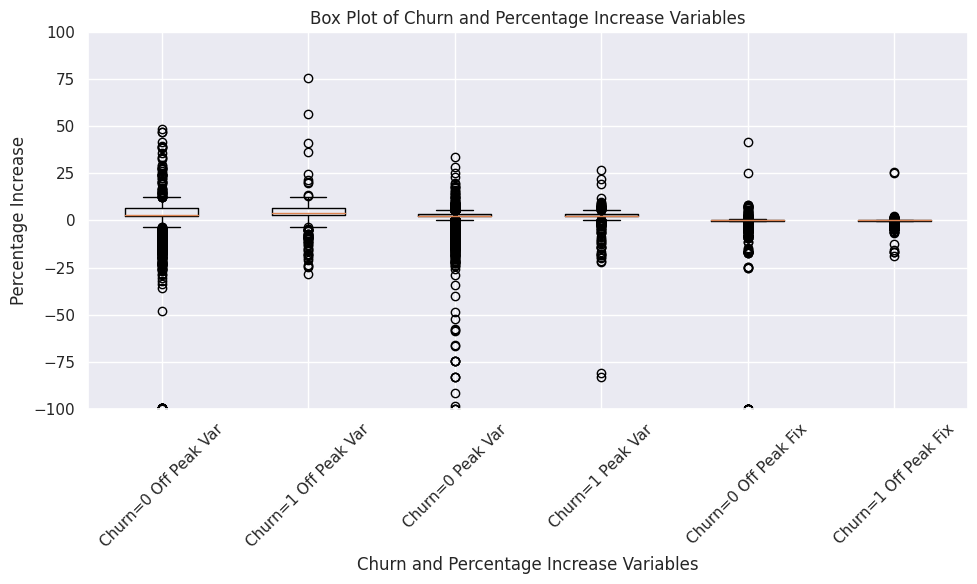

In [ ]:
import matplotlib.pyplot as plt

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot([
    percent_df[percent_df['churn'] == 0]['percentage_increase_off_peak_var'],
    percent_df[percent_df['churn'] == 1]['percentage_increase_off_peak_var'],
    percent_df[percent_df['churn'] == 0]['percentage_increase_peak_var'],
    percent_df[percent_df['churn'] == 1]['percentage_increase_peak_var'],
    percent_df[percent_df['churn'] == 0]['percentage_increase_off_peak_fix'],
    percent_df[percent_df['churn'] == 1]['percentage_increase_off_peak_fix']
], labels=['Churn=0 Off Peak Var', 'Churn=1 Off Peak Var', 'Churn=0 Peak Var', 'Churn=1 Peak Var', 'Churn=0 Off Peak Fix', 'Churn=1 Off Peak Fix'])
plt.xlabel('Churn and Percentage Increase Variables')
plt.ylabel('Percentage Increase')
plt.title('Box Plot of Churn and Percentage Increase Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(-100, 100)
# Show plot
plt.show()
